In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Shape of training images:", train_images.shape)
print("Shape of testing images:",test_images.shape)
print("Length of training labels:", len(train_labels))
print("Length of testing labels:", len(test_labels))


Shape of training images: (60000, 28, 28)
Shape of testing images: (10000, 28, 28)
Length of training labels: 60000
Length of testing labels: 10000


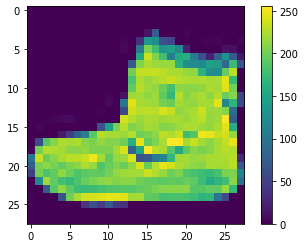

In [5]:
# preprocess images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


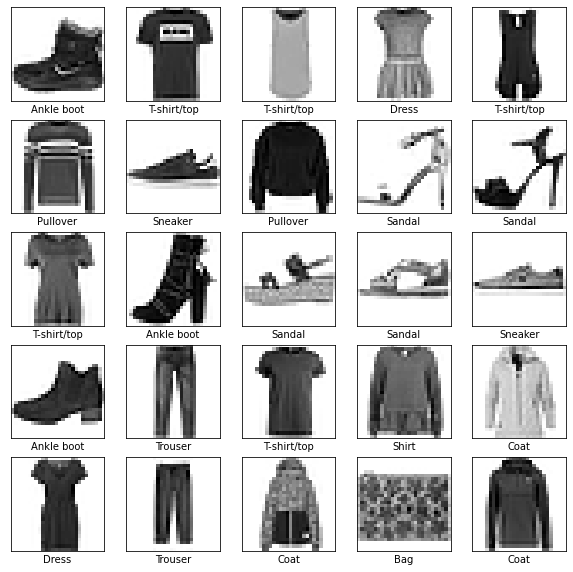

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.6523 - accuracy: 0.6681
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7092 - accuracy: 0.7253
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5974 - accuracy: 0.7839
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5458 - accuracy: 0.8117
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5177 - accuracy: 0.8190
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5090 - accuracy: 0.8258
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4983 - accuracy: 0.8285
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4893 - accuracy: 0.8320
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4770 - accuracy: 0.8370
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.485

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.5986 - accuracy: 0.8105

Test accuracy: 0.8105000257492065


In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[1.3070961e-10 3.7755727e-12 1.1264419e-35 3.6314889e-11 1.4789797e-29
 3.7741773e-02 7.7876563e-19 9.4246291e-02 4.9127390e-11 8.6801195e-01]
9
9


In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

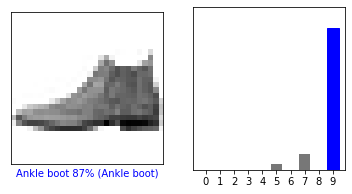

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

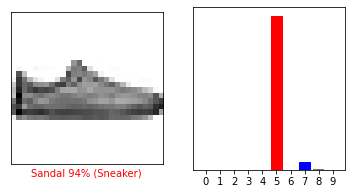

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

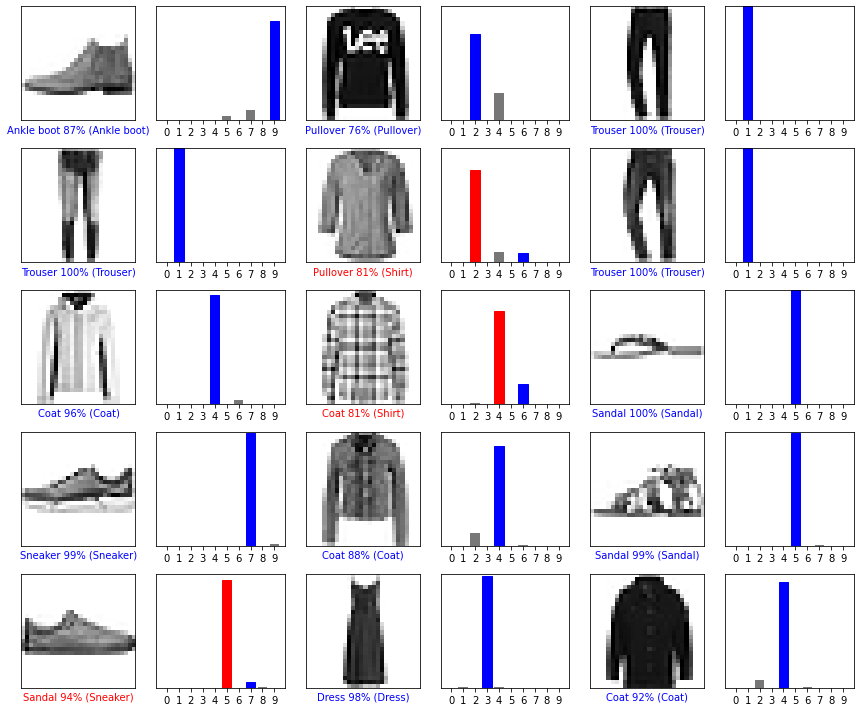

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [1]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)
plt.imshow(img, cmap=plt.cm.binary)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

# Now predict the correct label for this image:
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

print(class_names[np.argmax(predictions_single[0])])

NameError: name 'test_images' is not defined